In [11]:
import matplotlib.pyplot as plt
import numpy as np 
from scipy.optimize import minimize, rosen, rosen_der
from scipy import interpolate
import scipy
import os 
from scipy.optimize import curve_fit
from scipy.integrate import simps
import pandas as pd

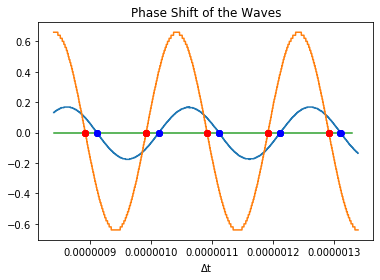

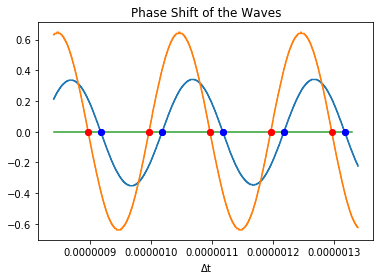

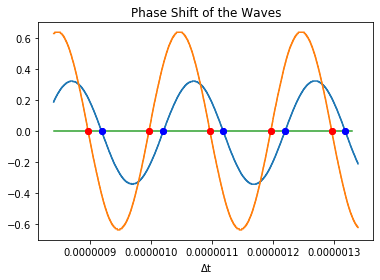

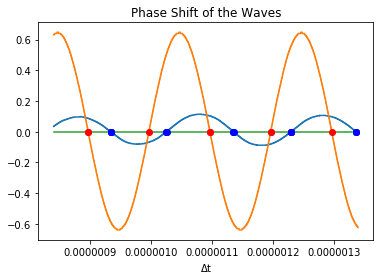

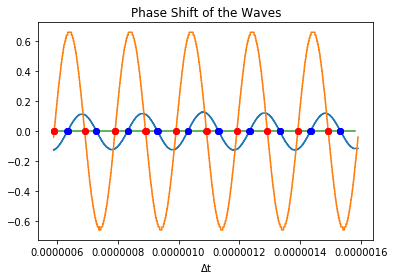

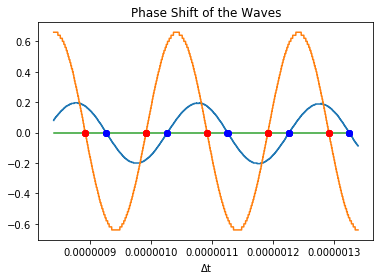

In [278]:
time_differences_all = np.array([]) 
for m in [1,2,3,4,14,15]:
    
    x = str(m)
    curve1 = pd.read_csv("C:/Users/19133/Desktop/OneDrive_2021-10-07/5MHz/" + x + "/ALL0000/F0000CH1.csv",header=None)
    curve2 = pd.read_csv("C:/Users/19133/Desktop/OneDrive_2021-10-07/5MHz/" + x + "/ALL0000/F0000CH2.csv",header=None)
    
    #plt.figure()
    plt.plot(curve1[3], curve1[4])
    plt.plot(curve2[3], curve2[4])

    #def test_func(x, a, b):
    #    return a * np.cos(b * x)

    #params, params_covariance = optimize.curve_fit(test_func, curve2[3], curve2[4],p0=[0.6, 1450])
    
    #plt.plot(curve1[3],test_func(curve2[3],params[0],params[1]))
    
    x = np.arange(min(curve1[3]),max(curve1[3]),0.00000001)
    y = 0*x
    plt.plot(x,y)
    
    g = np.where(curve1[4] == 0)
    f = np.where(curve2[4] == 0)
    
    plt.plot(curve1[3][g[0]],curve1[3][g[0]]*0,'bo')
    plt.plot(curve2[3][f[0]],curve2[3][f[0]]*0,'ro')
    
    plt.xlabel('$\Delta$t')
    plt.title('Phase Shift of the Waves')
    plt.savefig('fig')
    plt.show()
    
    #time_differences_single = [] 
    
    for n in [0]:
        shift = np.abs(curve2[3][f[0][n]] - curve1[3][g[0][n]])
        time_differences_all = np.append(time_differences_all,shift)
    
    #np.append(time_differences_single)

[1.92e-08 2.08e-08 2.22e-08 3.70e-08 4.40e-08 3.46e-08]


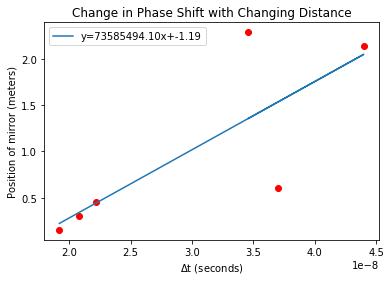

In [280]:
dist_m = np.array([1/3.281,2/3.281,3/3.281,4/3.281,14/3.281,15/3.281])
print(time_differences_all)
plt.plot(time_differences_all,dist_m/2,'ro')

m, b = np.polyfit(time_differences_all, dist_m/2, 1)
plt.plot(time_differences_all, m*time_differences_all + b,label='y={:.2f}x+{:.2f}'.format(m,b))
plt.ylabel('Position of mirror (meters)')
plt.xlabel('$\Delta$t (seconds)')
plt.title('Change in Phase Shift with Changing Distance')

plt.legend()
plt.savefig('fig2')